In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img_raw = cv2.imread('C:/Users/User/Desktop/mandrill_colour.png')

In [3]:
type(img_raw)

numpy.ndarray

In [4]:
img_raw.shape

(288, 288, 3)

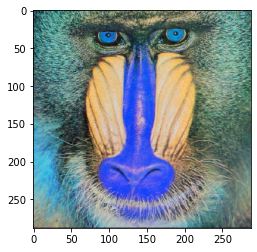

In [5]:
plt.imshow(img_raw)

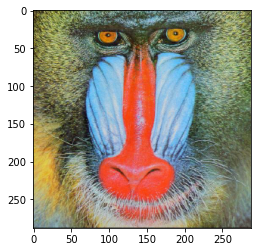

In [8]:
img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# Create a black image which will act as a template.

In [9]:
# Drawing Image

image_blank = np.zeros(shape=(512,512,3),dtype=np.int16)

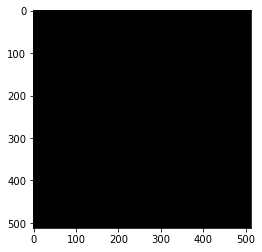

In [10]:
plt.imshow(image_blank)

# Straight Line

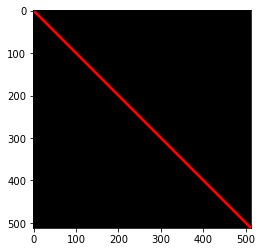

In [14]:
# Draw a diagonal red line with thickness of 5 px
line_red = cv2.line(image_blank,(0,0),(511,511),(255,0,0),5)
plt.imshow(line_red)

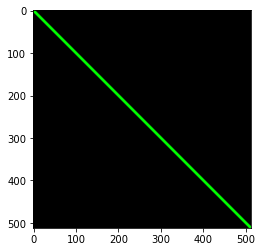

In [15]:
# Draw a diagonal green line with thickness of 5 px
line_green = cv2.line(image_blank,(0,0),(511,511),(0,255,0),5)
plt.imshow(line_green)

# Rectangle

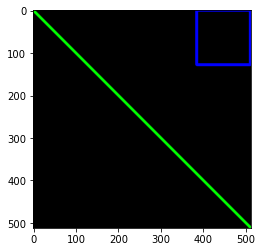

In [17]:
#Draw a blue rectangle with a thickness of 5 px

rectangle= cv2.rectangle(image_blank,(384,0),(510,128),(0,0,255),5)
plt.imshow(rectangle)

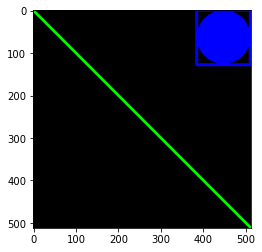

In [19]:
img = cv2.circle(image_blank,(447,63), 63, (0,0,255), -1) # -1 corresponds to a filled circle
plt.imshow(img)

# writing on image

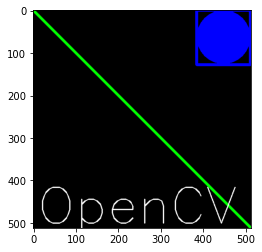

In [20]:
font = cv2.FONT_HERSHEY_SIMPLEX
text = cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
plt.imshow(text)

# 4.Face Detection

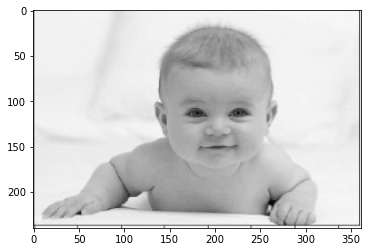

In [21]:
#Loading the image to be tested
test_image = cv2.imread('C:/Users/User/Desktop/23_s00udx.jpg')

#Converting to grayscale
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Displaying the grayscale image
plt.imshow(test_image_gray, cmap='gray')
#Since we know that OpenCV loads an image in BGR format, so we need to convert it into RBG format to be able to display its true colors. Let us write a small function for that.

In [22]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [23]:
 haar_cascade_face = cv2.CascadeClassifier('C:/Users/User/Music/Face-Detection-in-Python-using-OpenCV-master/data/haarcascades/haarcascade_frontalface_default.xml')

In [24]:
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))

Faces found:  1


In [25]:
for (x,y,w,h) in faces_rects:
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

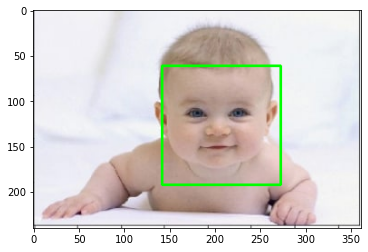

In [26]:
plt.imshow(convertToRGB(test_image))

# Face Detection with generalized function

In [27]:
def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()

    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)

    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 15)

    return image_copy

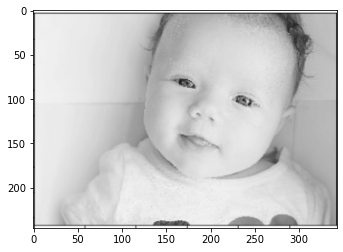

In [32]:
#loading image
test_image2 = cv2.imread(r'C:\Users\User\Desktop\26_aqjfqi.jpg')

  # Converting to grayscale
test_image_gray = cv2.cvtColor(test_image2, cv2.COLOR_BGR2GRAY)

  # Displaying grayscale image
plt.imshow(test_image_gray, cmap='gray')

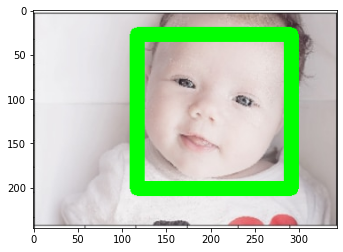

In [35]:
#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2)

 #convert to RGB and display image
plt.imshow(convertToRGB(faces))

# detectMultiscale

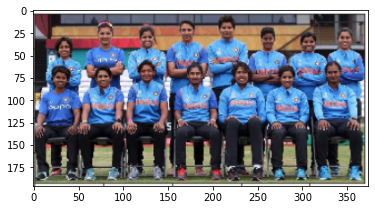

In [36]:
#loading image
test_image2 = cv2.imread('C:/Users/User/Music/Face-Detection-in-Python-using-OpenCV-master/data/group.png')

#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))